# Spinning Earth due to an Asteroid Impact

ModSim Project 3

Kristtiya Guerra, HK Rho

In [41]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
import random
import decimal
import math

In [42]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
d = UNITS.degrees
rad = UNITS.radians

<Unit('radian')>

ASTEROID: 99942Apophis

# First Part - Until Collision

In [43]:
# Making a state & system object
x0 = 4.64e8
y0 = 5421106.354806868


# And an inition condition (with everything in SI units)
init = State(x = x0 * m, 
             y = y0 * m, 
             v_x = -25000 * m/s, # m/s - X Velocity of Asteroid
             v_y = 0 * m/s, # m/s - Y Velocity of Asteroid
             )

,values
x,464000000.0 meter
y,5421106.354806868 meter
v_x,-25000.0 meter / second
v_y,0.0 meter / second


In [44]:
r_asteroid = 185 * m
r_earth = 6.371e6*m 

system = System(init=init,
                m_earth = 5.972e24 * kg,
                c_earth = 40.075e6 * m,
                Vol_earth = 1.08320692e21 * m**3,
                init_w_earth = 7.2921159e-5 * rad/s ,
                density_asteroid = 3200 * kg / m**3,
                m_asteroid = 6.1e10 * kg,
            
                G=6.674e-11 * m**3 * kg **-1 * s **-2, 
                striking_angle = 45 * d,
               
                r_final=r_asteroid + r_earth,
                t_0=0,
                t_end=1e10
                )


,values
init,x 464000000.0 meter y 5421106....
m_earth,5.972e+24 kilogram
c_earth,40075000.0 meter
Vol_earth,1.08320692e+21 meter ** 3
init_w_earth,7.2921159e-05 radian / second
density_asteroid,3200.0 kilogram / meter ** 3
m_asteroid,61000000000.0 kilogram
G,6.674e-11 meter ** 3 / kilogram / second ** 2
striking_angle,45 degree
r_final,6371185.0 meter


In [45]:
def y_dependingOn_angle(angle):
    
    y = r_earth * math.sin(angle)
    
    return y

In [46]:
y = y_dependingOn_angle(system.striking_angle)

<Quantity(4504977.302939494, 'meter')>

In [47]:
def universal_gravitation(init, system):
    """Computes gravitational force between Asteroid and Earth.
    """
    x, y, v_x, v_y = init
    unpack(system)

    forceMag = G * m_earth * m_asteroid / (x**2 + y**2)
    #negative because it is positive outwards (distance increases as I go out)
    r = Vector(-x, -y)
    gravity = forceMag * r.hat()
    
    return gravity

In [48]:
universal_gravitation(init, system)

<Quantity([-1.12904424e+08 -1.31910967e+06], 'kilogram * meter / second ** 2')>

In [49]:
def slope_func(init, dt, system):
    x, y, v_x, v_y = init

    unpack(system)
    
    gravity = universal_gravitation(init, system)
    dxdt = v_x
    dydt = 0
    dvxdt = gravity[0]/ m_asteroid
    dvydt = 0
    
    return dxdt, dydt, dvxdt, dvydt

In [50]:
slope_func(init, 0, system)

(<Quantity(-25000.0, 'meter / second')>,
 0,
 <Quantity(-0.001850892190713955, 'meter / second ** 2')>,
 0)

In [51]:
def event_func(init, dt, system):
    x, y, v_x, v_y = init
    r = Vector(x,y)
    
    return r.x - system.r_final # m

In [52]:
event_func(init, 0, system)

<Quantity(457628815.0, 'meter')>

In [53]:
results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[[18213.153174550844]]
nfev,50
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


In [54]:
results

,x,y,v_x,v_y
0.000000,4.640000e+08,5.421106e+06,-25000.000000,0.0
0.820203,4.639795e+08,5.421106e+06,-25000.001518,0.0
9.022236,4.637744e+08,5.421106e+06,-25000.016707,0.0
91.042566,4.617239e+08,5.421106e+06,-25000.169340,0.0
911.245865,4.412181e+08,5.421106e+06,-25001.773685,0.0
9113.278850,2.360505e+08,5.421106e+06,-25033.148562,0.0
18213.153175,6.371185e+06,5.421106e+06,-25512.207195,0.0


In [55]:
v_at_collision = get_last_value(results.v_x) * m/s

<Quantity(-25512.20719498253, 'meter / second')>

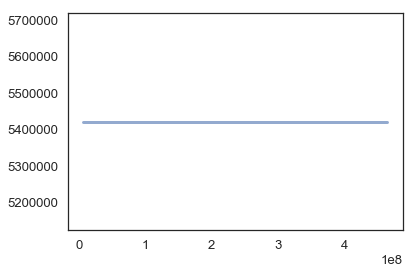

In [56]:
x = results.x
y = results.y

plot(x,y)

# Second Part - Math

def make_system(init):
    unpack(system)
    
    V_Collision = v_at_collision
    
Maybe ;)

"""
Function that converts:
Diameter of the asteroid -> Volume of the asteroid
Volume of the asteroid -> Mass of the asteroid
"""

def D_to_mass(D_asteroid, system):
    unpack(system)
    
    volume_asteroid = 4/3 * pi * (D_asteroid/2)**3
    m_asteroid = density_asteroid * volume_asteroid
    
    return m_asteroid

In [60]:
def make_system(ang_asteroid):
    
    return System(init=init,
                  m_earth = 5.972e24 * kg,
                  c_earth = 40.075e6 * m,
                  Vol_earth = 1.08320692e21 * m**3,
                  init_w_earth = 7.2921159e-5 * rad/s ,
                  density_asteroid = 3200 * kg / m**3,
                  m_asteroid = 6.1e10 * kg,
            
                  G=6.674e-11 * m**3 * kg **-1 * s **-2, 
                  striking_angle = ang_asteroid,
               
                  r_final=r_asteroid + r_earth,
                  t_0=0,
                  t_end=1e10
                 )

In [61]:
"""
Function that converts:
energy from the asteroid -> angular velocity of the earth
"""

def energy_to_velocity(system, v_at_collision):
    #r_asteroid = (D_asteroid * m) / 2
    unpack(system)
    
    inertia_earth = (2/5 * m_earth * (r_earth**2))
    inertia_asteroid = (2/5 * m_asteroid * (r_asteroid**2))
    inertia_both = inertia_earth + inertia_asteroid
    
    final_w_earth = sqrt(((m_asteroid * (v_at_collision**2)) + (inertia_earth * (init_w_earth**2))) / inertia_both) 
    print(init_w_earth)
    #sqrt(  ((m_asteroid * (v_at_collision**2))  
    return final_w_earth #rad/sec

In [62]:
w = energy_to_velocity(system, v_at_collision)

7.2921159e-05 radian / second


<Quantity(7.292115900280768e-05, '1 / second')>

In [63]:
def time_for_revolution(w_earth, system):
    unpack(system)
    
    time = c_earth / (r_earth * w_earth) 
    #print(time)
    
    return time

In [64]:
output = time_for_revolution(w, system)

<Quantity(86260.57788100872, 'second')>

In [65]:
output.to(UNITS.hours)

<Quantity(23.961271633613535, 'hour')>

In [66]:
#making a sweepseries of angles

dA = 10 # deg
ang_asteroid = linrange(0, 90, dA, endpoint = True) # m in diameter


sweep_angle = SweepSeries()

for i in range(len(ang_asteroid)):
    system = make_system(ang_asteroid[i])
    
    results, details = run_ode_solver(system, slope_func, events=event_func)
    v_at_collision = get_last_value(results.v_x) * m/s
    w = energy_to_velocity(system, v_at_collision)
    output = time_for_revolution(w, system)
    hrs = output.to(UNITS.hours)
    
    
    sweep_angle[i] = hrs
    
    
print(sweep_angle)

7.2921159e-05 radian / second
7.2921159e-05 radian / second
7.2921159e-05 radian / second
7.2921159e-05 radian / second
7.2921159e-05 radian / second
7.2921159e-05 radian / second
7.2921159e-05 radian / second
7.2921159e-05 radian / second
7.2921159e-05 radian / second
7.2921159e-05 radian / second
0    23.961271633613535 hour
1    23.961271633613535 hour
2    23.961271633613535 hour
3    23.961271633613535 hour
4    23.961271633613535 hour
5    23.961271633613535 hour
6    23.961271633613535 hour
7    23.961271633613535 hour
8    23.961271633613535 hour
9    23.961271633613535 hour
dtype: object
